# Loan Prediction
## Binary Classification using Logistic Regression

### Importing Libraries

In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Importing & Loading the dataset

In [204]:
df = pd.read_csv('/content/train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Dataset Info:

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Dataset Shape:

In [206]:
df.shape

(614, 13)

## Data Cleaning

### Checking the Missing Values

In [207]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### Filling the Missing Values in "LoanAmount" & "Credit_History" by the 'Mean' & 'Mode' of the respective variables.

In [208]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [209]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [210]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [211]:
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])

In [212]:
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

### Check the Missing values for the final time!

In [213]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

### Drop all the missing values remaining.

In [214]:
df.dropna(inplace=True)

### Checking the final Dataset Shape

In [215]:
df.shape

(597, 13)

### Exploratory Data Analyis

#### Data Visualization

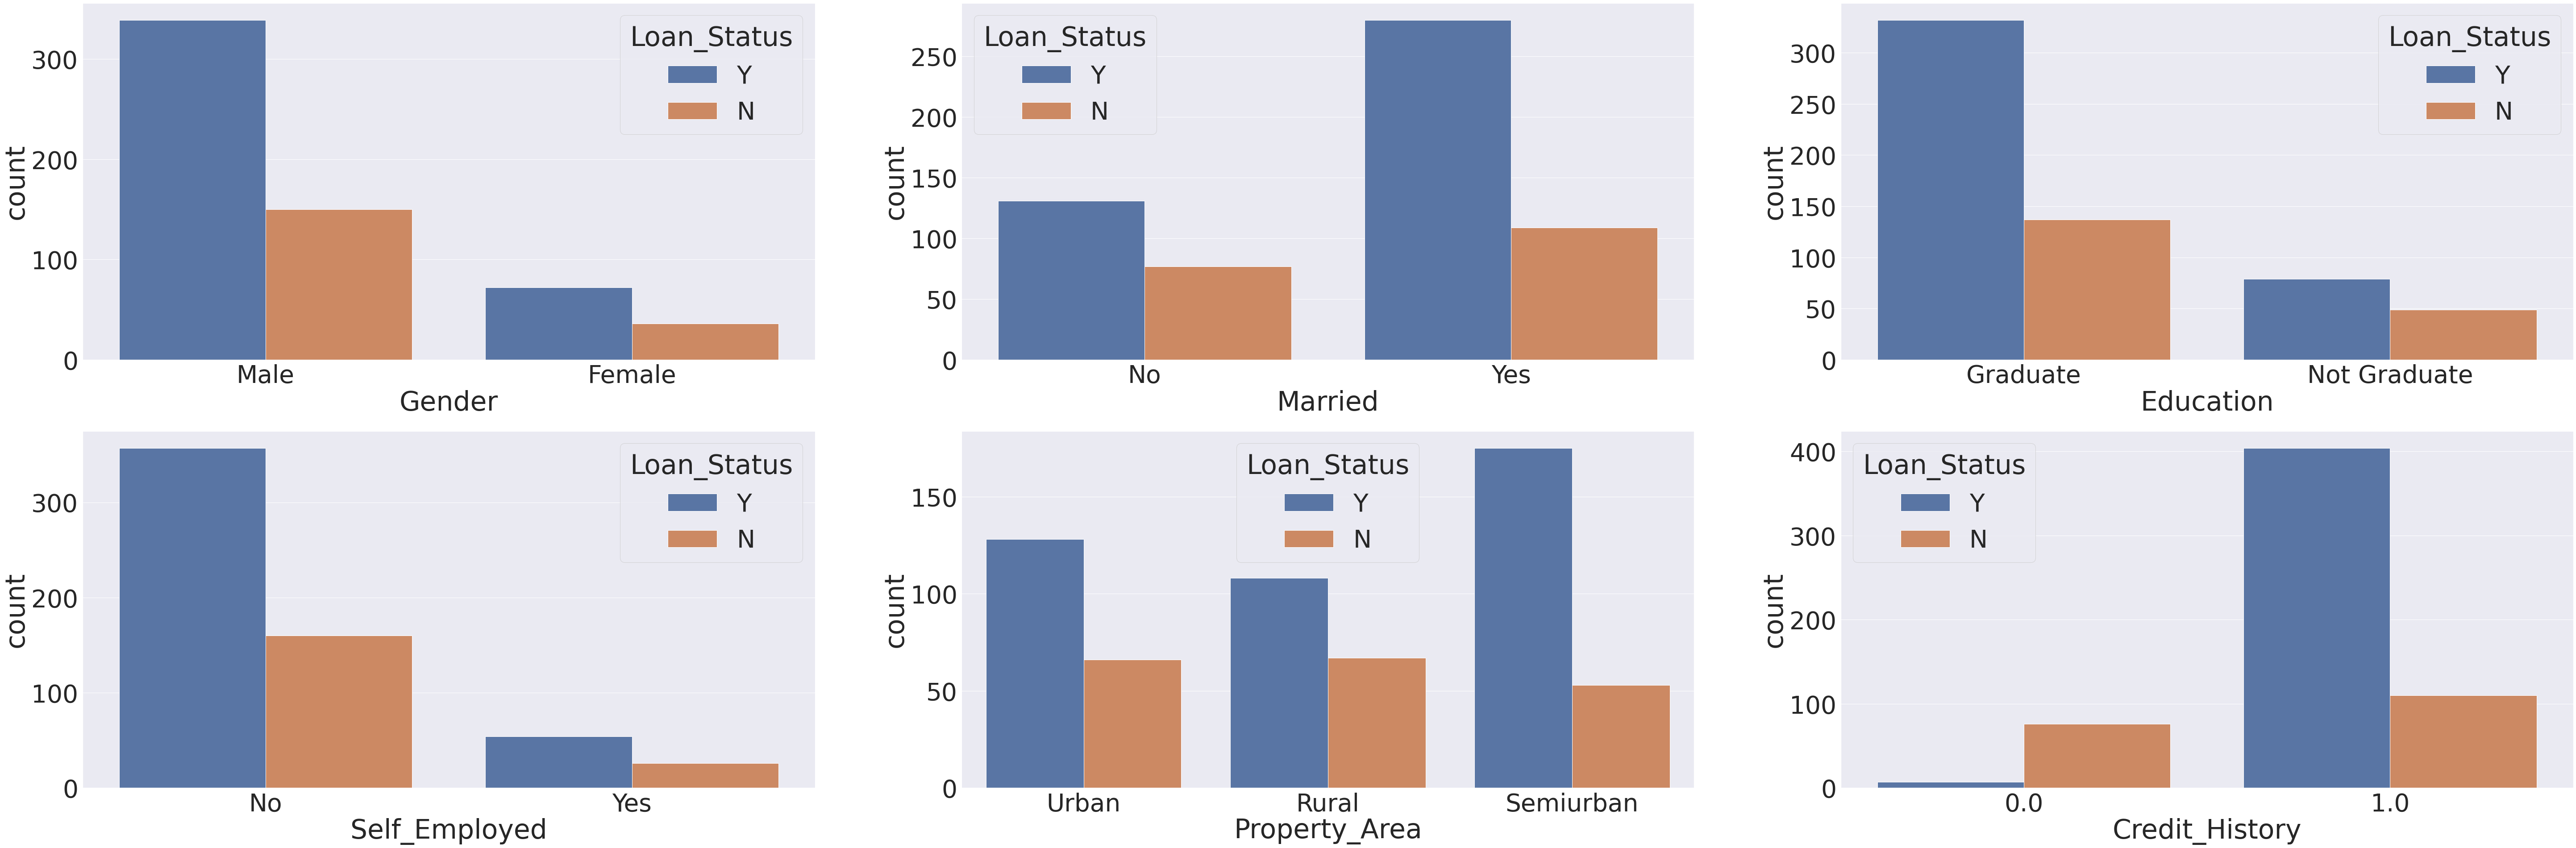

In [216]:
plt.figure(figsize = (100, 50))
sns.set(font_scale = 5)
plt.subplot(331)
sns.countplot(df['Gender'],hue=df['Loan_Status'])

plt.subplot(332)
sns.countplot(df['Married'],hue=df['Loan_Status'])

plt.subplot(333)
sns.countplot(df['Education'],hue=df['Loan_Status'])

plt.subplot(334)
sns.countplot(df['Self_Employed'],hue=df['Loan_Status'])

plt.subplot(335)
sns.countplot(df['Property_Area'],hue=df['Loan_Status'])

plt.subplot(336)
sns.countplot(df['Credit_History'],hue=df['Loan_Status'])



### Replacing the Variable values to Numerical form & display the Value Counts

Since Machine Learning Models can not work on categorical variables in the form of strings, so we need to change it into numerical form. We can assign numbers for each categories.

In [217]:
df['Loan_Status'].replace('Y',1,inplace=True)
df['Loan_Status'].replace('N',0,inplace=True)
df['Loan_Status'].value_counts()

In [219]:
df.Gender=df.Gender.map({'Male':1,'Female':0})
df['Gender'].value_counts()

1    489
0    108
Name: Gender, dtype: int64

In [220]:
df.Married=df.Married.map({'Yes':1,'No':0})
df['Married'].value_counts()

1    389
0    208
Name: Married, dtype: int64

In [221]:
df.Dependents=df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
df['Dependents'].value_counts()

0    345
1    101
2    101
3     50
Name: Dependents, dtype: int64

In [222]:
df.Education=df.Education.map({'Graduate':1,'Not Graduate':0})
df['Education'].value_counts()

1    469
0    128
Name: Education, dtype: int64

In [223]:
df.Self_Employed=df.Self_Employed.map({'Yes':1,'No':0})
df['Self_Employed'].value_counts()

0    517
1     80
Name: Self_Employed, dtype: int64

In [224]:
df.Property_Area=df.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})
df['Property_Area'].value_counts()

1    228
2    194
0    175
Name: Property_Area, dtype: int64

In [225]:
df['LoanAmount'].value_counts()

146.412162    21
120.000000    18
110.000000    16
100.000000    14
187.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: LoanAmount, Length: 204, dtype: int64

In [226]:
df['Loan_Amount_Term'].value_counts()

360.0    511
180.0     44
480.0     14
300.0     13
84.0       4
120.0      3
240.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [227]:
df['Credit_History'].value_counts()

1.0    514
0.0     83
Name: Credit_History, dtype: int64

In [228]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.359573,0.171799,-0.054665,-0.006740,0.059426,0.079305,0.106099,-0.082791,0.012388,-0.014196,0.022096
Married,0.359573,1.000000,0.339886,-0.022240,-0.001314,0.049472,0.074573,0.147005,-0.103810,0.010995,0.002774,0.092578
Dependents,0.171799,0.339886,1.000000,-0.055962,0.059753,0.116638,0.032497,0.163277,-0.101729,-0.038373,0.003336,0.018357
Education,-0.054665,-0.022240,-0.055962,1.000000,0.013807,0.138480,0.063692,0.164740,0.078576,0.061394,0.067926,0.080377
Self_Employed,-0.006740,-0.001314,0.059753,0.013807,1.000000,0.127887,-0.019019,0.121361,-0.034029,-0.012474,-0.034716,-0.011417
ApplicantIncome,0.059426,0.049472,0.116638,0.138480,0.127887,1.000000,-0.116201,0.566414,-0.043120,-0.023190,-0.006739,-0.006180
CoapplicantIncome,0.079305,0.074573,0.032497,0.063692,-0.019019,-0.116201,1.000000,0.188421,-0.059618,0.007831,0.015543,-0.062548
LoanAmount,0.106099,0.147005,0.163277,0.164740,0.121361,0.566414,0.188421,1.000000,0.038607,-0.010732,-0.038547,-0.041076
Loan_Amount_Term,-0.082791,-0.103810,-0.101729,0.078576,-0.034029,-0.043120,-0.059618,0.038607,1.000000,-0.000113,-0.079849,-0.022356
Credit_History,0.012388,0.010995,-0.038373,0.061394,-0.012474,-0.023190,0.007831,-0.010732,-0.000113,1.000000,0.003954,0.524163


From the above figure, we can see that **Credit_History** (Independent Variable) has the maximum correlation with **Loan_Status** (Dependent Variable). Which denotes that the Loan_Status is heavily dependent on the Credit_History.

### Final DataFrame

In [229]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


### Importing Packages for Classification algorithms

In [230]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

### Splitting the data into Train and Test set

In [231]:
X = df.iloc[:,1:-1]
y = df.iloc[:,12]

In [232]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75,random_state=0)

### Logistic Regression (LR)

Logistic regression is a supervised learning classification algorithm used to predict the probability of a target variable. 

Mathematically, a logistic regression model predicts P(Y=1) as a function of X. It is one of the simplest ML algorithms that can be used for various classification problems such as spam detection, Diabetes prediction, cancer detection etc.

In [233]:
model = LogisticRegression()
model.fit(X_train,y_train)

lr_prediction = model.predict(X_test)
print('Logistic Regression accuracy = ', metrics.accuracy_score(lr_prediction,y_test))

Logistic Regression accuracy =  0.82


#Decission Tree

Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

In [234]:
from sklearn.tree import DecisionTreeRegressor

In [235]:
dtreeRegr=DecisionTreeRegressor()
#make train model
dtreeRegr.fit(X_train,y_train)

lr_prediction = dtreeRegr.predict(X_test)
print('DecisionTree accuracy = ', metrics.accuracy_score(lr_prediction,y_test))

DecisionTree accuracy =  0.72


**CONCLUSION:**

1. The Loan Status is heavily dependent on the Credit History for Predictions.
2. The Logistic Regression algorithm gives us the maximum Accuracy (79% approx), and Decission Tree (69% approx).